In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-reviews/train_updayed.csv
/kaggle/input/cleaned-reviews/test_updayed.csv


In [2]:
train = pd.read_csv("/kaggle/input/cleaned-reviews/train_updayed.csv")

In [21]:
train.head(5)

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is,review complexity
0,0,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,15,current,Eleborate response
1,1,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,16,current,Eleborate response
2,2,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,15,current,Medium response
3,3,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,17,current,Medium response
4,4,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,15,current,Eleborate response


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99470 entries, 0 to 99469
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         99470 non-null  int64 
 1   uniqueID           99470 non-null  int64 
 2   drugName           99470 non-null  object
 3   condition          99470 non-null  object
 4   review             99470 non-null  object
 5   rating             99470 non-null  int64 
 6   date               99470 non-null  object
 7   usefulCount        99470 non-null  int64 
 8   year               99470 non-null  int64 
 9   how current it is  99470 non-null  object
 10  review complexity  99470 non-null  object
dtypes: int64(5), object(6)
memory usage: 8.3+ MB


In [23]:
train['reviewLength'] = train['review'].apply(len)

In [24]:
train.head(5)

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is,review complexity,reviewLength
0,0,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,15,current,Eleborate response,448
1,1,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,16,current,Eleborate response,719
2,2,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,15,current,Medium response,403
3,3,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,17,current,Medium response,142
4,4,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,15,current,Eleborate response,733


Text(0, 0.5, 'Number of Words')

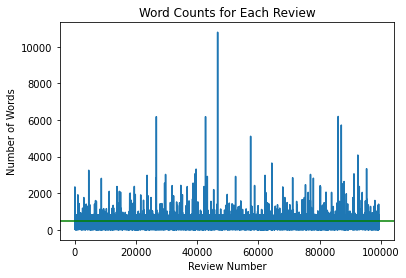

In [25]:
import matplotlib.pyplot as plt

train['reviewLength'].plot().axhline(y=512, color='green')
plt.title('Word Counts for Each Review')
plt.xlabel('Review Number')
plt.ylabel('Number of Words')

In [11]:
print(len(train[train['reviewLength'] > 512]), 'reviews exceeding BERT accepted size')

48671 reviews exceeding BERT accepted size


48.93033075299085


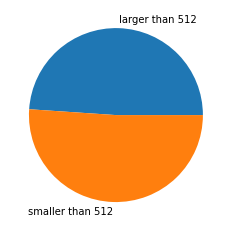

In [12]:
import matplotlib.pyplot as plt
import numpy as np

smalllen=len(train[train['reviewLength'] > 512])
biglen=len(train)
x = smalllen*100/(biglen)
print(x)

y = np.array([x, 100-x])

plt.pie(y, labels = ['larger than 512', 'smaller than 512'])
plt.show() 

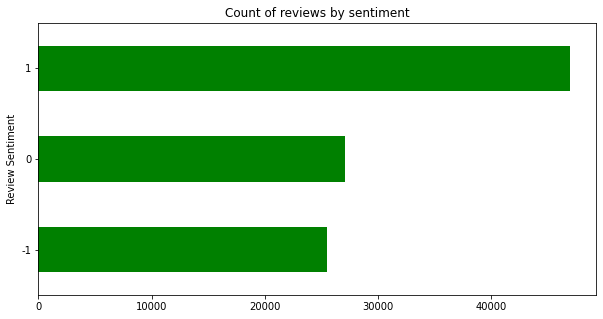

In [28]:
train['sentiment'] = train['rating'].apply(lambda rating : -1 if rating < 5 else 0 if rating >= 5 and rating <= 8 else 1)
ax = train['sentiment'].value_counts().sort_index().plot(kind='barh',
                                                      title='Count of reviews by sentiment',
                                                      figsize=(10,5),
                                                      color='green')

ax.set_ylabel('Review Sentiment')
plt.show()

In [29]:
train.sentiment.value_counts()

 1    46900
 0    27054
-1    25516
Name: sentiment, dtype: int64

In [15]:
pos = train.loc[train['sentiment'] == 1]
pos = pos[0:8500]

neg = train.loc[train['sentiment'] == -1]
neg = neg[0:8500]

In [30]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt


def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["review"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [31]:
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))

In [32]:
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [33]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

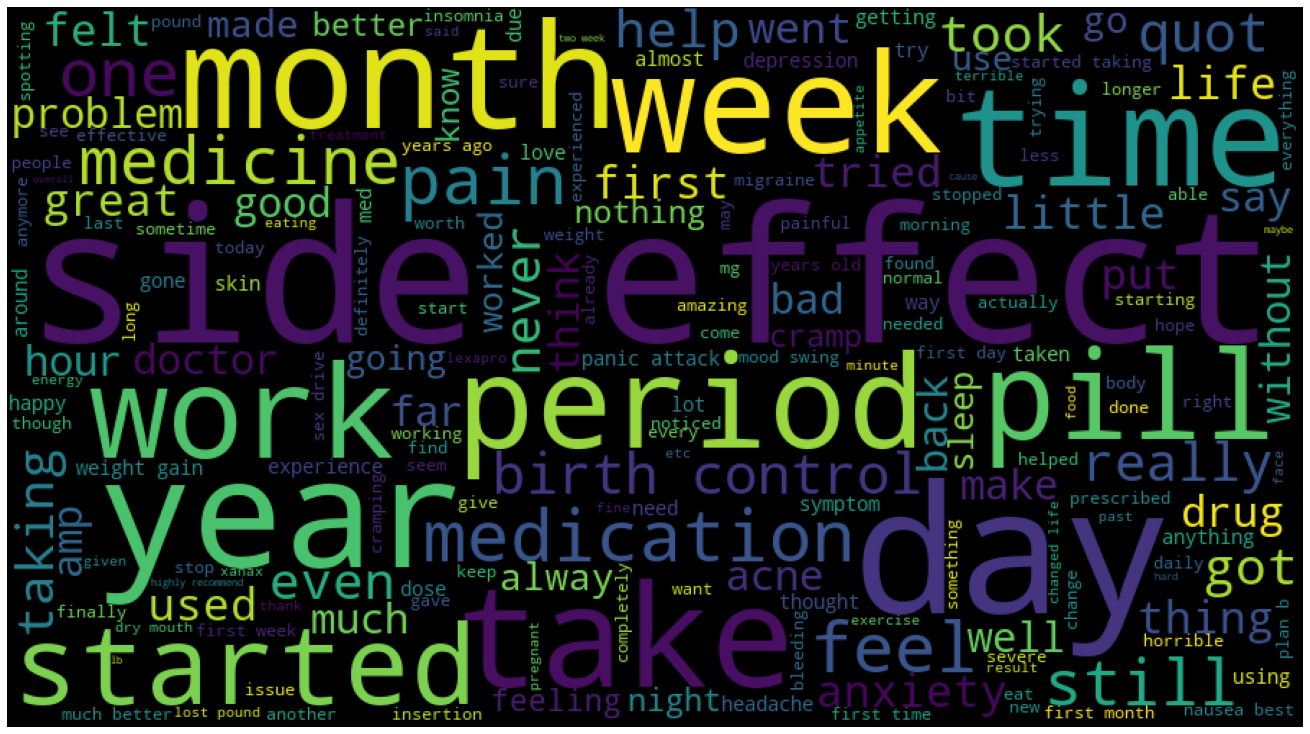

In [34]:
posCloud = plot_Cloud(pos_wordcloud)

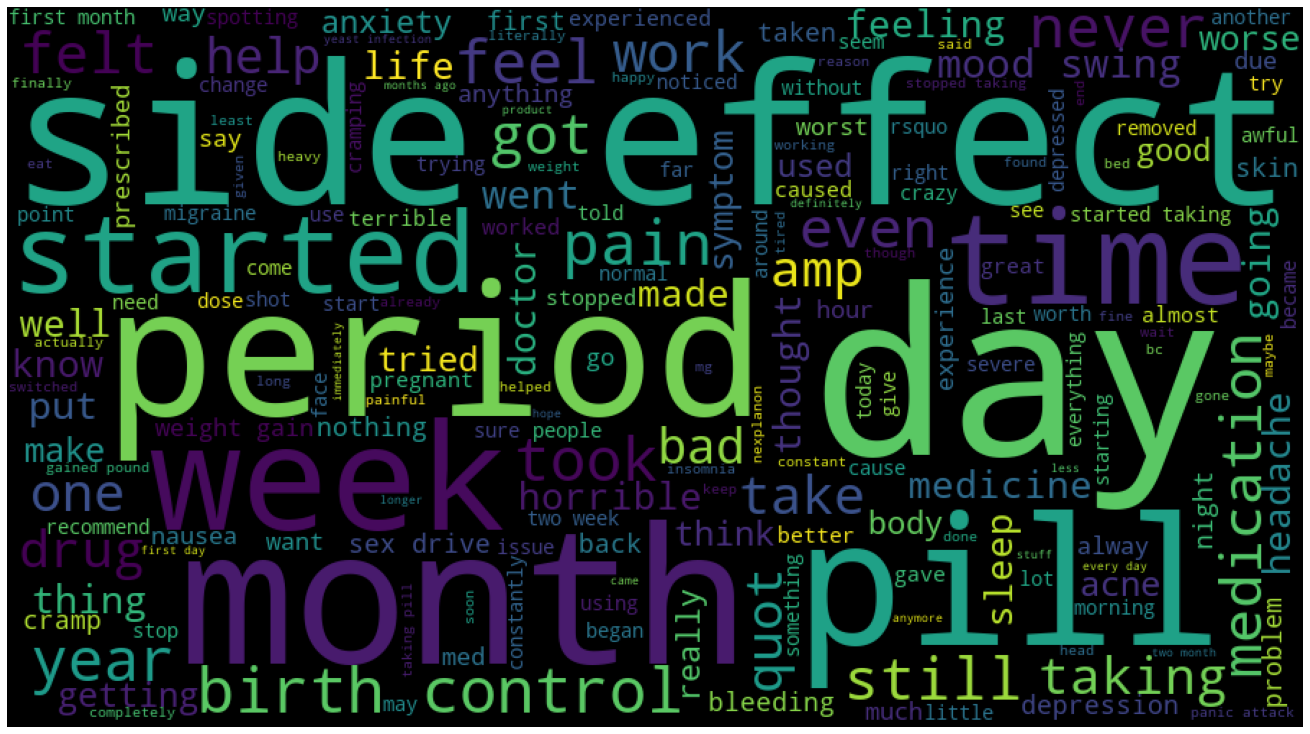

In [35]:
negCloud = plot_Cloud(neg_wordcloud)

In [88]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')
tokenizer = nltk.tokenize.word_tokenize

In [175]:
train['cleaned'] = (train['review'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))).str.replace('[^\w\s]', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [176]:
import re
clean = np.empty(len(train['cleaned']), dtype=object)

for i in range(len(train['cleaned'])):
    clean[i] = re.sub('039', '\'', train['cleaned'].iloc[i])
    
train['clean'] = clean
# del train['cleaned']

In [177]:
train.head(10)

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is,review complexity,reviewLength,sentiment,expanded,noSW,stemmed,cleaned,clean
0,0,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,15,current,Eleborate response,448,0,this is my first time using any form of birth ...,first time using form birth control im glad we...,first time use form birth control im glad went...,this is my first time using any form of birth ...,this is my first time using any form of birth ...
1,1,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,16,current,Eleborate response,719,1,suboxone has completely turned my life around ...,suboxone completely turned life around feel he...,suboxon complet turn life around feel healthie...,suboxone has completely turned my life around ...,suboxone has completely turned my life around ...
2,2,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,15,current,Medium response,403,-1,nd day on mg started to work with rock hard er...,day mg started work rock hard erections howeve...,nd day mg start work rock hard erect howev exp...,2nd day on 5mg started to work with rock hard ...,2nd day on 5mg started to work with rock hard ...
3,3,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,17,current,Medium response,142,-1,he pulled out but he cummed a bit in me i took...,pulled cummed bit took plan b hours later took...,pull cum bit took plan b hour later took pregn...,he pulled out but he cummed a bit in me i took...,he pulled out but he cummed a bit in me i took...
4,4,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,15,current,Eleborate response,733,1,abilify changed my life there is hope i was on...,abilify changed life hope zoloft clonidine fir...,abilifi chang life hope zoloft clonidin first ...,abilify changed my life there is hope i was on...,abilify changed my life there is hope i was on...
5,5,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,16,current,Eleborate response,737,0,i had been on the pill for many years when my ...,pill many years doctor changed rx chateal effe...,pill mani year doctor chang rx chateal effect ...,i had been on the pill for many years when my ...,i had been on the pill for many years when my ...
6,6,29607,Topiramate,Migraine Prevention,"""I have been on this medication almost two wee...",9,1-Jan-15,19,15,current,Eleborate response,730,1,i have been on this medication almost two week...,medication almost two weeks started mg working...,medic almost two week start mg work way mg cur...,i have been on this medication almost two week...,i have been on this medication almost two week...
7,7,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10,14,more distant,Eleborate response,786,-1,started nexplanon months ago because i have a...,started nexplanon months ago minimal amount co...,start nexplanon month ago minim amount contrac...,started nexplanon 2 months ago because i have ...,started nexplanon 2 months ago because i have ...
8,8,81890,Liraglutide,Obesity,"""I have been taking Saxenda since July 2016. ...",9,19-Jan-17,20,17,current,Eleborate response,733,1,i have been taking saxenda since july i had s...,taking saxenda since july severe nausea month ...,take saxenda sinc juli sever nausea month got ...,i have been taking saxenda since july 2016 i h...,i have been taking saxenda since july 2016 i h...
9,9,219869,Amitriptyline,ibromyalgia,"""I&#039;ve been taking amitriptyline since Jan...",9,15-Mar-17,39,17,current,Eleborate response,711,1,ive been taking amitriptyline since january a...,ive taking amitriptyline since january diagnos...,ive take amitriptyli

In [178]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train['expanded']=train['clean'].apply(lambda x:expand_contractions(x))

In [179]:
train['expanded'].head(15)

0     this is my first time using any form of birth ...
1     suboxone has completely turned my life around ...
2     2nd day on 5mg started to work with rock hard ...
3     he pulled out but he cummed a bit in me i took...
4     abilify changed my life there is hope i was on...
5     i had been on the pill for many years when my ...
6     i have been on this medication almost two week...
7     started nexplanon 2 months ago because i have ...
8     i have been taking saxenda since july 2016 i h...
9     i have been taking amitriptyline since january...
10    i have been on every medicine under the sun it...
11    i have insomnia it is horrible my story begins...
12    nexplanon does its job i can have worry free s...
13    i live in western australia and disturbed by s...
14    do not use the cream that comes with this it t...
Name: expanded, dtype: object

In [183]:
def removeNumbers(s):
    s =  ''.join(c for c in s if not c.isdigit())
    return s

In [184]:
train['noNumbers'] = np.array([removeNumbers(text) for text in train['expanded']])

In [185]:
train['noNumbers'].head(10)

0    this is my first time using any form of birth ...
1    suboxone has completely turned my life around ...
2    nd day on mg started to work with rock hard er...
3    he pulled out but he cummed a bit in me i took...
4    abilify changed my life there is hope i was on...
5    i had been on the pill for many years when my ...
6    i have been on this medication almost two week...
7    started nexplanon  months ago because i have a...
8    i have been taking saxenda since july  i had s...
9    i have been taking amitriptyline since january...
Name: noNumbers, dtype: object

In [180]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['st', 'nd', 'rd', 'th'])
def removeStopWords(s):
    s =  " ".join([word for word in s.split()
                  if word not in stop_words
                  ])
    return s;

In [186]:
train['noSW'] = np.array([removeStopWords(text) for text in train['noNumbers']])

In [187]:
train['noSW'].head(10)

0    first time using form birth control glad went ...
1    suboxone completely turned life around feel he...
2    day mg started work rock hard erections howeve...
3    pulled cummed bit took plan b hours later took...
4    abilify changed life hope zoloft clonidine fir...
5    pill many years doctor changed rx chateal effe...
6    medication almost two weeks started mg working...
7    started nexplanon months ago minimal amount co...
8    taking saxenda since july severe nausea month ...
9    taking amitriptyline since january diagnosed f...
Name: noSW, dtype: object

In [188]:
stemmer = nltk.stem.snowball.SnowballStemmer(language='english')

def stemming(s):
    s = ' '.join([stemmer.stem(word) for word in s.split()]) 
    return s

In [189]:
train['stemmed'] = np.array([stemming(text) for text in train['noSW']])

In [190]:
train.head(10)

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is,review complexity,reviewLength,sentiment,expanded,noSW,stemmed,cleaned,clean,noNumbers
0,0,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,15,current,Eleborate response,448,0,this is my first time using any form of birth ...,first time using form birth control glad went ...,first time use form birth control glad went pa...,this is my first time using any form of birth ...,this is my first time using any form of birth ...,this is my first time using any form of birth ...
1,1,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,16,current,Eleborate response,719,1,suboxone has completely turned my life around ...,suboxone completely turned life around feel he...,suboxon complet turn life around feel healthie...,suboxone has completely turned my life around ...,suboxone has completely turned my life around ...,suboxone has completely turned my life around ...
2,2,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,15,current,Medium response,403,-1,2nd day on 5mg started to work with rock hard ...,day mg started work rock hard erections howeve...,day mg start work rock hard erect howev experi...,2nd day on 5mg started to work with rock hard ...,2nd day on 5mg started to work with rock hard ...,nd day on mg started to work with rock hard er...
3,3,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,17,current,Medium response,142,-1,he pulled out but he cummed a bit in me i took...,pulled cummed bit took plan b hours later took...,pull cum bit took plan b hour later took pregn...,he pulled out but he cummed a bit in me i took...,he pulled out but he cummed a bit in me i took...,he pulled out but he cummed a bit in me i took...
4,4,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,15,current,Eleborate response,733,1,abilify changed my life there is hope i was on...,abilify changed life hope zoloft clonidine fir...,abilifi chang life hope zoloft clonidin first ...,abilify changed my life there is hope i was on...,abilify changed my life there is hope i was on...,abilify changed my life there is hope i was on...
5,5,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,16,current,Eleborate response,737,0,i had been on the pill for many years when my ...,pill many years doctor changed rx chateal effe...,pill mani year doctor chang rx chateal effect ...,i had been on the pill for many years when my ...,i had been on the pill for many years when my ...,i had been on the pill for many years when my ...
6,6,29607,Topiramate,Migraine Prevention,"""I have been on this medication almost two wee...",9,1-Jan-15,19,15,current,Eleborate response,730,1,i have been on this medication almost two week...,medication almost two weeks started mg working...,medic almost two week start mg work way mg cur...,i have been on this medication almost two week...,i have been on this medication almost two week...,i have been on this medication almost two week...
7,7,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10,14,more distant,Eleborate response,786,-1,started nexplanon 2 months ago because i have ...,started nexplanon months ago minimal amount co...,start nexplanon month ago minim amount contrac...,started nexplanon 2 months ago because i have ...,started nexplanon 2 months ago because i have ...,started nexplanon months ago because i have a...
8,8,81890,Liraglutide,Obesity,"""I have been taking Saxenda since July 2016. ...",9,19-Jan-17,20,17,current,Eleborate response,733,1,i have been taking saxenda since july 2016 i h...,taking saxenda since july severe nausea month ...

In [191]:
pd.Series(''.join(train['stemmed']).split()).value_counts()[:20]

day       61553
take      56830
month     48772
get       40214
week      39988
year      38681
effect    37793
feel      36855
start     33885
work      33679
side      33652
period    33084
time      32867
pain      30408
first     29973
like      29541
mg        29391
would     28274
pill      28253
go        23063
dtype: int64

In [195]:


train.head(5)


,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is,review complexity,reviewLength,sentiment,noSW,stemmed,cleanedReviews
0,0,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,15,current,Eleborate response,448,0,first time using form birth control glad went ...,first time use form birth control glad went pa...,this is my first time using any form of birth ...
1,1,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,16,current,Eleborate response,719,1,suboxone completely turned life around feel he...,suboxon complet turn life around feel healthie...,suboxone has completely turned my life around ...
2,2,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,15,current,Medium response,403,-1,day mg started work rock hard erections howeve...,day mg start work rock hard erect howev experi...,nd day on mg started to work with rock hard er...
3,3,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,17,current,Medium response,142,-1,pulled cummed bit took plan b hours later took...,pull cum bit took plan b hour later took pregn...,he pulled out but he cummed a bit in me i took...
4,4,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,15,current,Eleborate response,733,1,abilify changed life hope zoloft clonidine fir...,abilifi chang life hope zoloft clonidin first ...,abilify changed my life there is hope i was on...


In [196]:
train.to_csv('stemmedNoNumbers.csv', index=False)